In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [8]:

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

input_img = tf.keras.Input(shape=(784,))
encoded = layers.Dense(64, activation='relu')(input_img)     
decoded = layers.Dense(784, activation='sigmoid')(encoded)    

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3855 - val_loss: 0.2956
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2888 - val_loss: 0.2829
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2789 - val_loss: 0.2785
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2755 - val_loss: 0.2764
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2736 - val_loss: 0.2753
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2737 - val_loss: 0.2745
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2722 - val_loss: 0.2741
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2714 - val_loss: 0.2736
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2719 - val_loss: 0.2733
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2710 - val_loss: 0.2733
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2708 - val_loss: 0.2731
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


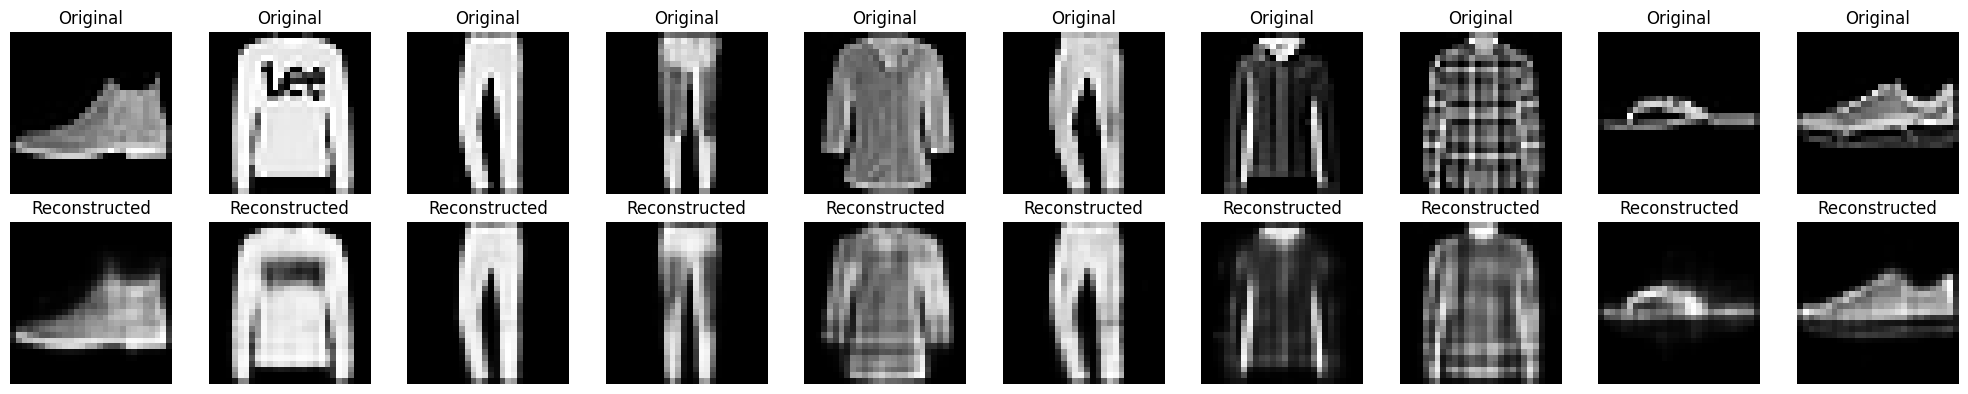

In [9]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  #10 images shown
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()


Summary: Autoencoder with Dense Layers on Fashion MNIST

We built a basic autoencoder using only Dense (fully connected) layers to compress and reconstruct grayscale images from the Fashion MNIST dataset. The images, each representing a clothing item (like shirts, sneakers, bags), were flattened from 28×28 to 784-dimension vectors, encoded into a 64-dimensional latent space, and then decoded back to their original shape.

The model was trained using the Adam optimizer and binary crossentropy loss function.

---

Key Learnings (Fashion MNIST):

1. **Fashion MNIST is more complex than digit data (like MNIST)**:
   - The dataset has more fine-grained patterns (e.g., fabric textures, shapes), so reconstructions are slightly blurry with Dense-only models.
   - CNNs perform better on such datasets, but this example proves even basic Dense models can learn rough reconstructions.

2. **Compression via Latent Space (64-d)**:
   - The encoder learns to reduce each image to a 64-value representation, retaining the most important features.
   - The decoder expands it back to 784 pixels, approximating the original.

3. **Loss Function**:
   - Binary crossentropy remains appropriate since pixel values are normalized between 0 and 1.
   - The loss reduces as reconstructions get closer to original images.

4. **Batch Size Impact** (when increased from 64 to 256):
   - Slight drop in reconstruction quality, especially for fine-grained patterns like shoes or shirts.
   - You may notice reconstructions looking less sharp or washed out if the model doesn't generalize as well.
